# Pymaceuticals Inc.
---

### Analysis

• Capomulin and Ramicane are the most effective drug treatments as they reduce the tumor size better than Infubinol and Ceftamin.

•  Tumor volume vs. time point for a mouse treated with Capomulin indicates that the treartment starts to show effcetiveness in approximately 20 day. It takes approximately 40 days for the treatment to show significant reduction in tumor volumn. 

• There is a positive correlation between mouse weight and average tumor volume, it is 0.84. As the mouse weight increases, the average tumor volume increases.




In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_Data= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
Mouse_Data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
Mouse_Data_unique_mice = Mouse_Data["Mouse ID"].nunique()
Mouse_Data_unique_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID
Mouse_Data['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting all the data for duplicate Mouse
Mouse_Data_duplicate = Mouse_Data.loc[(Mouse_Data['Mouse ID'] == 'g989')]
Mouse_Data_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Dropping the duplicate mouse by its ID and creating Clean DataFrame
clean_study = Mouse_Data.loc[(Mouse_Data['Mouse ID'] != 'g989')] 
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
clean_study['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by Regimens
regimens_group = clean_study.groupby("Drug Regimen")

#Calculating Mean, Median, Variance, Standard Deviation and SEM of the Tumor Volume.
meanTumor = round(regimens_group['Tumor Volume (mm3)'].mean(), 2)
medianTumor = round(regimens_group['Tumor Volume (mm3)'].median(), 2)
varTumor = round(regimens_group['Tumor Volume (mm3)'].var(),2)
stdTumor = round(regimens_group['Tumor Volume (mm3)'].std(), 2)
semTumor = round(regimens_group['Tumor Volume (mm3)'].sem(ddof=0), 4)

# Creating DataFrame and Displaying

Summary_df = pd.DataFrame ({
    "Mean Tumor Volume": meanTumor,
    "Median Tumor Volume" : medianTumor,
    "Tumor Volume Variance" : varTumor,
    "Tumor Volume Std. Dev." : stdTumor,
    "Tumor Volume Std. Er" : semTumor})

Summary_df = Summary_df[[
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance", 
    "Tumor Volume Std. Dev.", 
    "Tumor Volume Std. Er"]]

Summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Er
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3286
Ceftamin,52.59,51.78,39.29,6.27,0.4685
Infubinol,52.88,51.82,43.13,6.57,0.4909
Ketapril,55.24,53.70,68.55,8.28,0.6023
Naftisol,54.33,52.51,66.17,8.13,0.5949
Placebo,54.03,52.29,61.17,7.82,0.5797
Propriva,52.32,50.45,43.85,6.62,0.5425
Ramicane,40.22,40.67,23.49,4.85,0.3202
Stelasyn,54.23,52.43,59.45,7.71,0.5715


In [11]:
# Summary Statistics Table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat_df = clean_study.groupby(clean_study["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", 
                                               "median", 
                                               "var", 
                                               "std", 
                                               "sem"])
summary_stat_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

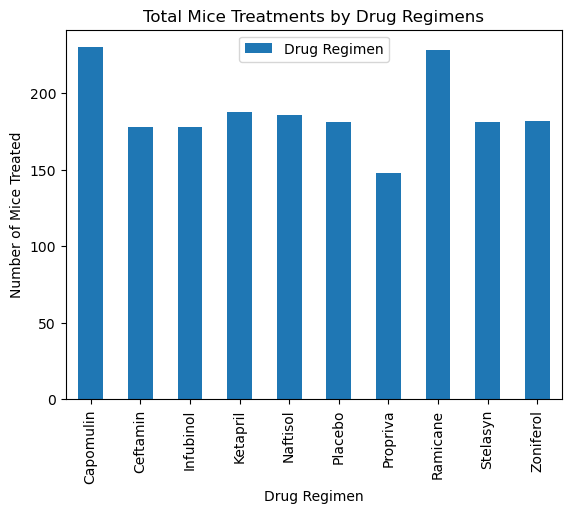

In [12]:
# Bar plot showing the total number of timepoints for all mice tested for each drug regimen.

# Grouping Mouse count by Drug Regimens 
count_mice = pd.DataFrame(regimens_group['Drug Regimen'].count())

# Plotting 
count_mice.plot(kind="bar")
plt.title("Total Mice Treatments by Drug Regimens")
plt.ylabel("Number of Mice Treated")
plt.show()


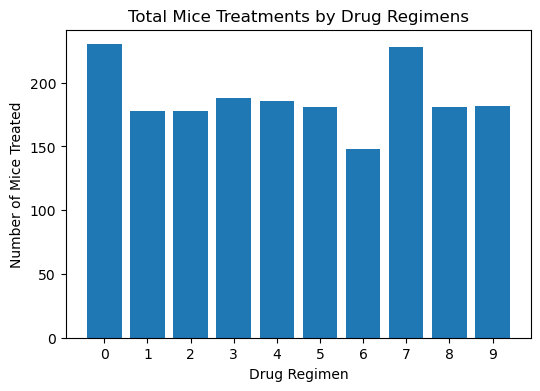

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(regimens_group['Drug Regimen']))
x_axis_labels = regimens_group['Drug Regimen']
plt.figure(figsize=(6,4))
plt.bar(x_axis, regimens_group['Drug Regimen'].count())


plt.xticks([value for value in x_axis])


# Set titles for the chart
plt.title("Total Mice Treatments by Drug Regimens")
plt.ylabel("Number of Mice Treated")
plt.xlabel("Drug Regimen")

plt.show()



In [14]:
clean_study.tail(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


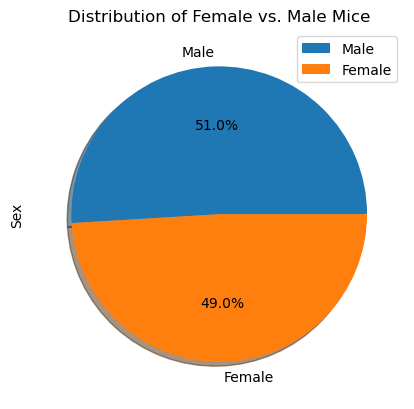

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex = pd.DataFrame(clean_study['Sex'].value_counts())

# Plotting 
mice_sex.plot.pie(y='Sex', shadow=True, autopct='%1.1f%%')
plt.title("Distribution of Female vs. Male Mice")
plt.show()

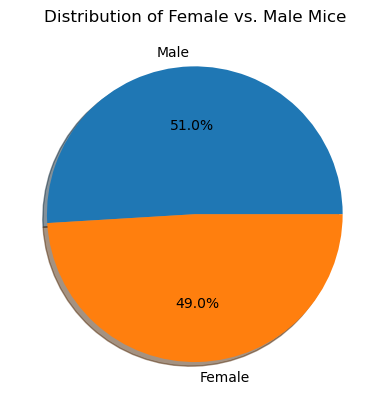

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_study['Sex'].unique()

# The values of each section of the pie chart
sex = clean_study['Sex'].value_counts()

# Create the pie chart and find the percentages of each part of the pie chart
plt.title("Distribution of Female vs. Male Mice")
plt.pie(sex, labels=labels, shadow=True, autopct="%1.1f%%") 

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
by_mouse = clean_study.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = by_mouse_reset[['Mouse ID','Timepoint']].merge(clean_study,on=['Mouse ID','Timepoint'],how="left")


def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")



Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


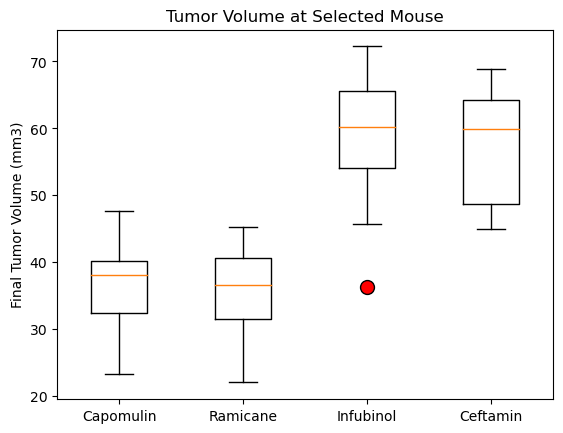

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')

plt.show()

## Line and Scatter Plots

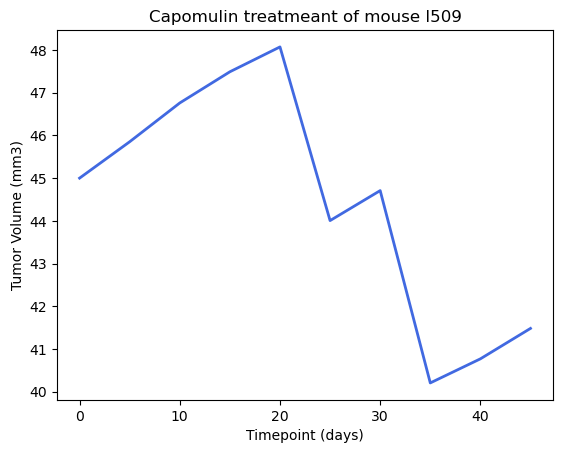

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

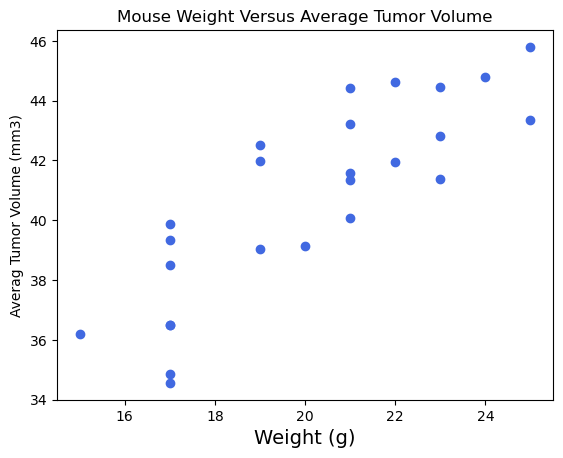

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


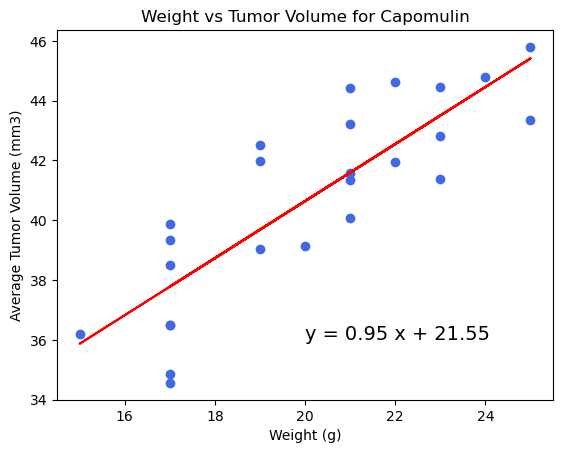

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")

plt.show()